# Crash emulator processing 

We want to create an emulator capable of predicting if a parameter dataset will lead to successful or crashed simulation, based on a previous 300 perturbed physics ensemble ran at CNRM. This Notebook creates the inputdata and outputdata array readable by the emulator. 

#### Emulator equation : Y = f(X) 
* Y is a 1x300 binary matrice Y={0:failed,1:succeeded} containing the list of failed/successed simulations.
* X is a 30X300 matrice containing the 3à values of the hysical parameters, for the 300 perturbations.

## Import modules

In [1]:
# Computational modules 
%matplotlib inline
import xarray as xr
import glob
import os
import numpy as np
import netCDF4
from netCDF4 import Dataset
import pandas as pd
import re
from array import array
from pylab import *

# Plotting modules 
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap
import pandas.plotting
import matplotlib.ticker as ticker
# scatter plot matrix des variables quantitatives
from pandas.plotting import scatter_matrix
import seaborn as sns; sns.set()

# Keras modules 
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam
from keras.regularizers import l2
import keras.backend as K
from scipy import stats
from keras import layers
from keras.optimizers import RMSprop

# Scikit-learn
from sklearn.tree import DecisionTreeRegressor

Using TensorFlow backend.


## Read the input.csv file and create inputdata array

In [2]:
# Read data from file 'input.csv' 
# Then arrange nicely the data in dataframe and change data type of the values
data = pd.read_csv("./input.csv",sep=' ')
inputdata=data.drop(['t_IDs'],axis=1)
#INP = inputdata.transpose()
inputdata

,AKN,ALPHAT,ALD,ALMAVE,AGREF,AGRE1,AGRE2,RAUTEFR,RQLCR,RAUTEFS,...,VVN,VVX,ALFX,REFLCAPE,FNEBC,GCVTURB,RLWINHF_ICE,RLWINHF_LIQ,RSWINHF_ICE,RSWINHF_LIQ
0,0.175049,1.488544,1.449805,15.532379,-0.238847,2.270914,5.235486,0.006996,0.000441,0.003952,...,-3.147981,-38.083048,0.071004,6.731691,14.254849,0.000063,0.864952,0.677901,0.768799,0.744990
1,0.121135,0.670766,1.378806,17.467465,-0.225716,3.088520,6.590831,0.003974,0.000527,0.005401,...,-2.934194,-41.202220,0.127523,3.178057,8.218562,0.000053,0.782406,0.777564,0.721309,0.837602
2,0.167680,1.880158,1.973222,14.357632,-0.250957,4.865664,7.353332,0.006406,0.000642,0.004999,...,-4.301296,-32.742882,0.056741,4.810351,12.882991,0.000074,0.802851,0.616178,0.800514,0.733552
3,0.173487,2.086636,2.070605,21.338777,-0.278889,2.642393,4.222709,0.008153,0.000210,0.006296,...,-3.440333,-33.880859,0.074964,6.226616,3.646718,0.000077,0.779812,0.660804,0.648204,0.738744
4,0.160021,2.370838,1.835850,15.060141,-0.301109,5.391311,3.782260,0.003023,0.000394,0.003919,...,-4.611250,-35.147508,0.088527,5.486981,8.104176,0.000077,0.906631,0.754324,0.828823,0.746475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.163872,2.736582,0.851156,26.111547,-0.155597,1.131551,2.797022,0.006913,0.000169,0.002175,...,-4.883335,-25.924171,0.096291,0.386752,0.168907,0.000098,0.829398,0.577758,0.549168,0.888836
296,0.274858,1.419111,2.514090,25.663451,-0.411510,3.485938,6.203646,0.007755,0.000355,0.005669,...,-4.753258,-49.040097,0.164670,9.953595,9.611947,0.000027,0.995207,0.821871,0.504201,0.686163
297,0.197926,2.972243,1.692315,21.918375,-0.418075,0.002340,7.499519,0.001215,0.000873,0.003210,...,-1.224812,-26.390213,0.093774,8.721343,16.819777,0.000058,0.608357,0.970929,0.760589,0.571225
298,0.159194,2.766423,0.502980,17.348568,-0.395271,8.944777,9.659447,0.009158,0.000123,0.005501,...,-1.416034,-27.639792,0.064716,7.636470,3.969082,0.000028,0.924979,0.549787,0.982908,0.775761


In [15]:
# ligne temporaire : 
mean = inputdata['RQLCR'].mean()
print(mean)

0.0005249804129062814


In [6]:
# Save the parameters names in a list 
param_names=list(inputdata.columns.values)
param_names

# Save the numpy array in a file   
inp=inputdata.values
np.save('/data/home/globc/peatier/CNRMppe/crash_emulator/inputdata_file.npy', inp)

In [4]:
#inputdata[param_names[0]].hist()
#plt.show()

In [5]:
#inputdata[param_names[1]].hist()
#plt.show()

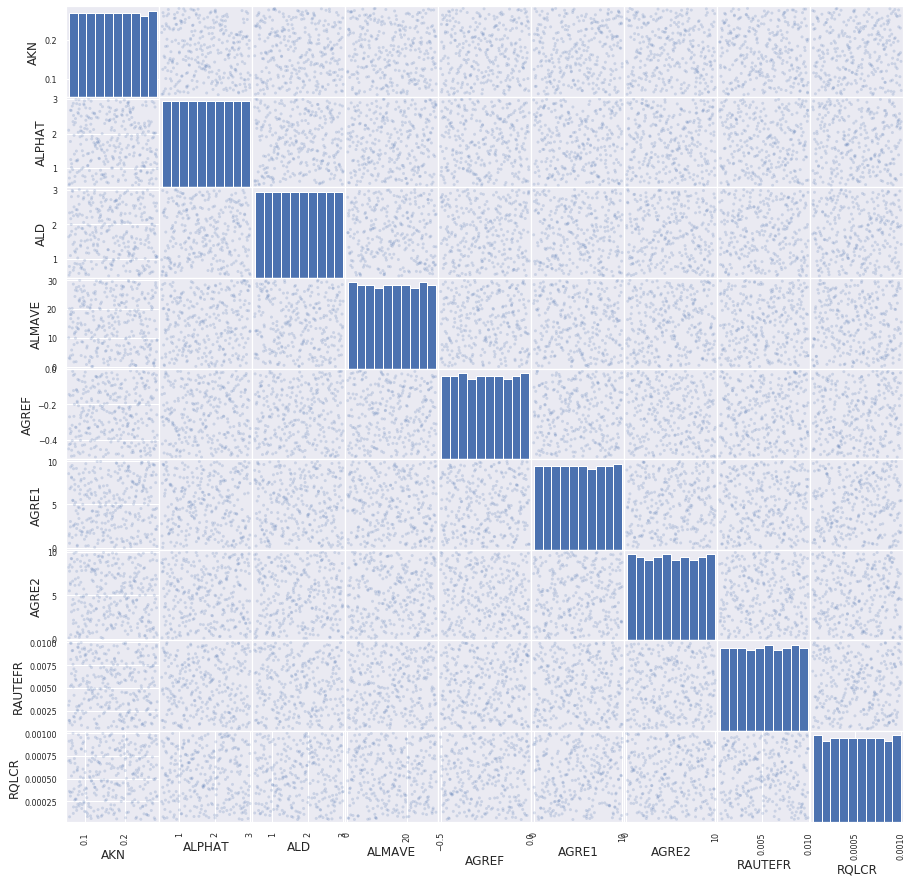

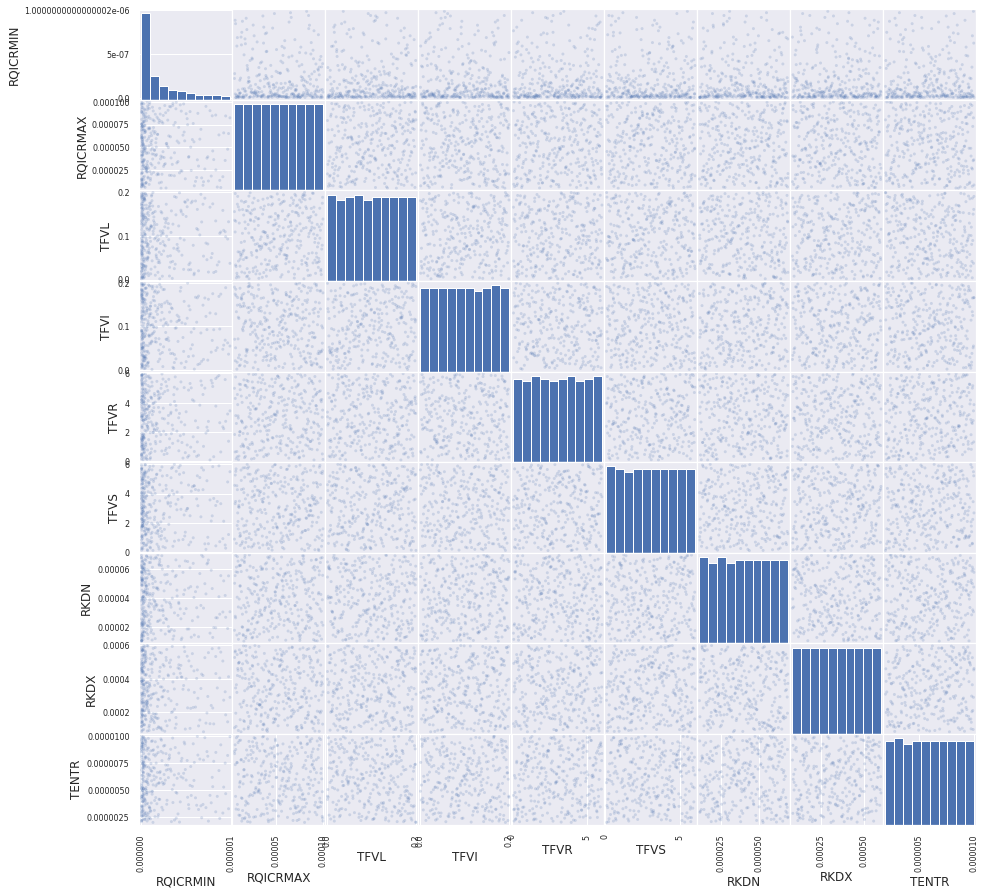

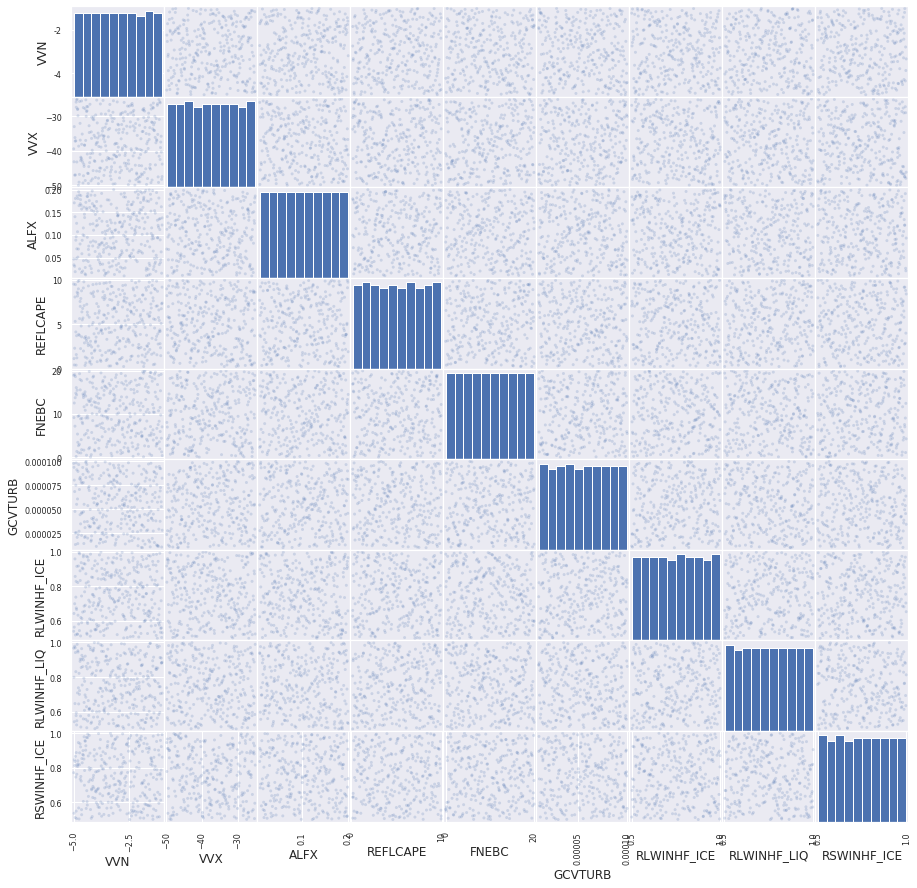

In [6]:
#Create plot


scatter_matrix(inputdata[param_names[0:9]], alpha=0.2, figsize=(15, 15), diagonal='hist')
plt.show()


scatter_matrix(inputdata[param_names[10:19]], alpha=0.2, figsize=(15, 15), diagonal='hist')
plt.show()


scatter_matrix(inputdata[param_names[20:29]], alpha=0.2, figsize=(15, 15), diagonal='hist')
plt.show()

## Read output.csv and create outputdata array

In [2]:
# Read data from file 'output.csv' 
# Then arrange nicely the data in dataframe and change data type of the values
data_out = pd.read_csv("./output.csv",sep=' ', header=None)
#data_out 

In [3]:
#Replace the ID by the line nmber
dfindex=data_out.replace('TUNINGV631.', ' ', regex=True)
#dfindex

In [7]:
# Create a dataframe 300x1 full of '1'
inputdata['Y']=1
Y = inputdata['Y'].to_frame()
#Y 

In [11]:
# Loop to update Y based on dfindex

list_line=[]

N=len(dfindex)
i=0
while i<N:
    nb = dfindex.iloc[i].astype(int)
    line_nb = ( nb - 1 )
    list_line.append(line_nb)
    i=i+1

Y.iloc[list_line] = 0
Y # 1=succeeded, 0=failed

,Y
0,1
1,0
2,1
3,1
4,1
...,...
295,1
296,0
297,0
298,1


In [12]:
# Save the numpy array in a file   
out=Y.values
np.save('/data/home/globc/peatier/CNRMppe/crash_emulator/outputdata_file.csv', out)